In [ ]:
# https://www.kaggle.com/competitions/playground-series-s3e23/data


import pandas as pd 
import numpy as np  
from ydata_profiling import ProfileReport
import seaborn as sns
import matplotlib.pyplot as plt 
%matplotlib inline

In [ ]:
data = pd.read_csv('data/train.csv', index_col=[0])

def Overview (data) :
    profile = ProfileReport(dark_mode=True, df=data)
    profile.to_file("output.html")

# Overview(data)

In [ ]:
# Data Analysis 

# As data is to much long so we use sample of data to analyze

# Creating Sample 

sample_data = data.sample(10000)
sample_data

In [ ]:
# Making the Univarient Data analysis

def UnivariateAnalysis(data, column):
    plt.figure(figsize=(12, 6))  

    plt.subplot(121)
    sns.histplot(data=data, x=column)
    plt.title(f'Countplot of {column}')

    plt.subplot(122)
    data[column].value_counts().plot(kind='pie', autopct='%1.1f%%')
    plt.title(f'Pie Chart of {column}')

    plt.tight_layout() 
    plt.show()

In [ ]:
UnivariateAnalysis(sample_data, 'defects')

In [ ]:
corr_df = sample_data.corr()['defects'].sort_values(ascending=False).drop(['defects'])
corr_df = pd.concat([corr_df.head(10), corr_df.tail(1)])
corr_df.index

In [ ]:
for column in corr_df.index :
    UnivariateAnalysis(sample_data, column)

In [ ]:
#  This show the very much skewness in data to check actual skewness we stats.probplot

from scipy import stats
def CheckSkewness(data, column):
    plt.figure(figsize=(12, 6)) 

    plt.subplot(121)
    sns.kdeplot(data[column]) 
    plt.title("Density Plot on " + column) 


    plt.subplot(122)
    stats.probplot(data[column], dist='norm', plot=plt)
    plt.title(f"Q-Q Plot of {column}")

    
    plt.tight_layout()
    plt.show()

In [ ]:
CheckSkewness(sample_data, 'loc')

In [ ]:
for column in corr_df.index :
    CheckSkewness(data, column)

In [ ]:
# These all are skew so we should go to the bining technique
for column in data.columns :
    print(column)
    print(data[column].value_counts().sort_values(ascending=False))

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import KBinsDiscretizer
from sklearn.compose import ColumnTransformer

In [ ]:
inputs = data.drop(['defects'], axis=1)
targets = data.defects

X_train, X_test, y_train, y_test = train_test_split(inputs, targets, test_size=0.2, random_state=42)

In [ ]:
data.isna().sum()

In [ ]:
data.describe()

In [ ]:
from sklearn.preprocessing import PowerTransformer

In [21]:
trf1 = ColumnTransformer([
    ("power", PowerTransformer(), ['loc', 'v(g)', 'ev(g)', 'iv(g)', 'n', 'v', 'l', 'd', 'i', 'e', 'b', 't','lOCode', 'lOComment', 'lOBlank', 'locCodeAndComment', 'uniq_Op', 'uniq_Opnd', 'total_Op', 'total_Opnd', 'branchCount'])
], remainder='passthrough', verbose_feature_names_out=False).set_output(transform='pandas')

In [23]:
X_train = trf1.fit_transform(X_train)
X_train

,loc,v(g),ev(g),iv(g),n,v,l,d,i,e,...,t,lOCode,lOComment,lOBlank,locCodeAndComment,uniq_Op,uniq_Opnd,total_Op,total_Opnd,branchCount
id,,,,,,,,,,,,,,,,,,,,,
41510,0.472416,0.997004,-0.637454,1.218094,0.823837,0.795839,-0.825709,0.954555,0.405773,0.876763,...,0.930289,0.474141,1.509440,1.459790,-0.295307,0.932521,0.346092,0.830631,0.858263,0.970443
24079,-0.077396,-0.123769,-0.637454,-0.174149,-0.206300,-0.177412,-0.251558,0.339627,-0.508758,-0.011818,...,0.005038,0.145632,-0.629032,-0.092498,-0.295307,0.244021,-0.494923,-0.176526,-0.253275,-0.102906
91367,-1.502699,-1.600153,-0.637454,-1.357429,-0.841686,-0.866854,1.598664,-0.921653,-0.552603,-0.927640,...,-1.069714,-0.915573,-0.629032,-0.599629,-0.295307,-1.039875,-0.777625,-0.936199,-0.776414,-1.630096
6237,-1.017682,-0.666294,-0.637454,-0.174149,-0.527582,-0.543121,1.074792,-0.597491,-0.314118,-0.522224,...,-0.580719,-0.526350,-0.629032,-0.599629,-0.295307,-0.520378,-0.628596,-0.495743,-0.612737,-0.622537
72207,-0.334215,-0.123769,-0.637454,-0.174149,-0.281060,-0.280429,0.444441,-0.184005,-0.173713,-0.200903,...,-0.207155,-0.100588,1.509440,-0.092498,-0.295307,-0.359305,-0.261674,-0.304517,-0.253275,-0.102906
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6265,1.024367,0.997004,1.515350,1.357491,0.951721,0.974877,-0.825709,1.114412,0.448814,0.951675,...,1.003310,1.037125,1.606309,0.511893,3.386307,0.932521,0.670670,1.039378,0.947927,0.970443
54886,1.073462,0.997004,1.575648,1.218094,0.916617,0.871001,-0.618596,0.663261,0.919806,0.761244,...,0.816280,1.037125,1.628819,1.541053,-0.295307,0.799466,0.839253,0.873526,1.017245,0.970443
76820,-0.409599,0.237873,1.515350,-1.357429,-0.527582,-0.431777,0.554387,-0.102644,-0.633986,-0.383904,...,-0.417912,-0.172510,-0.629032,0.252539,-0.295307,-0.050461,-0.628596,-0.539617,-0.541477,0.237241


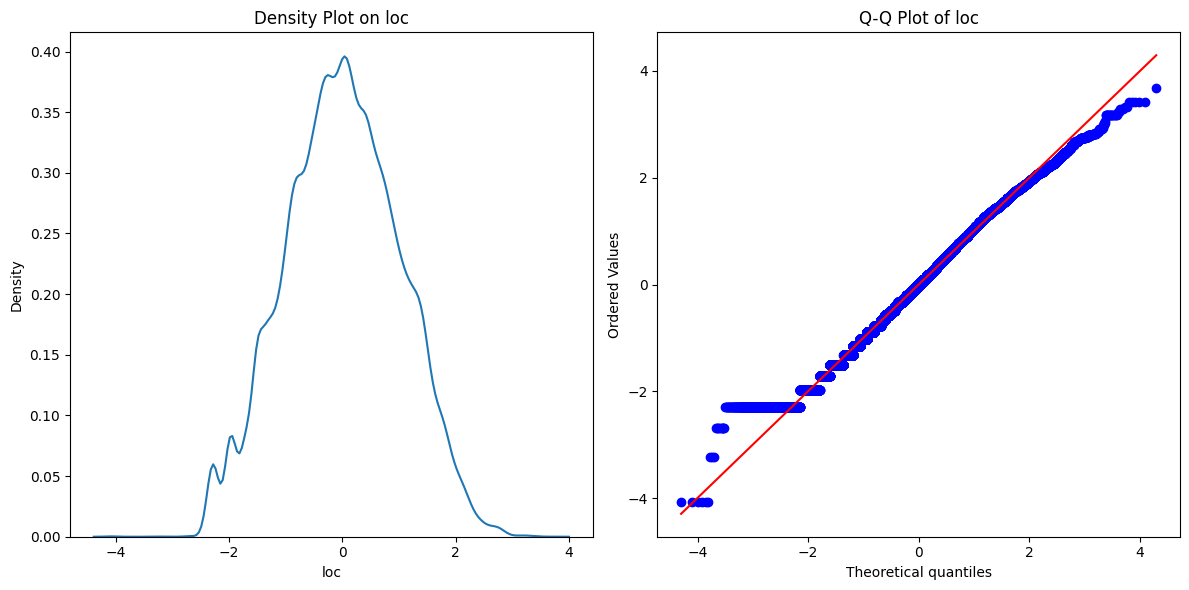

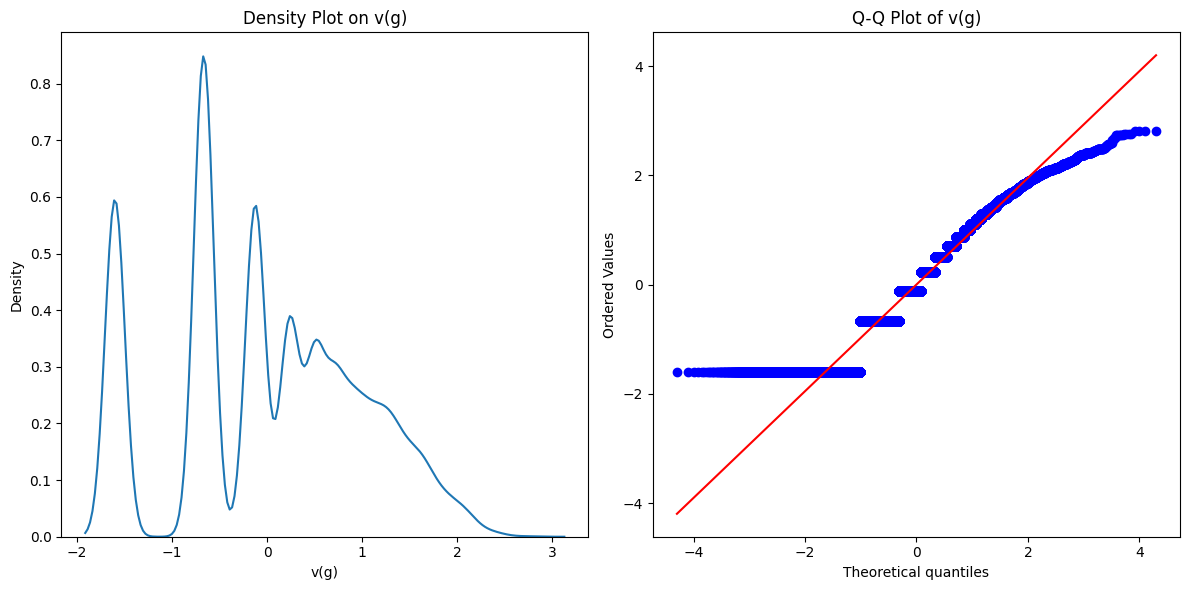

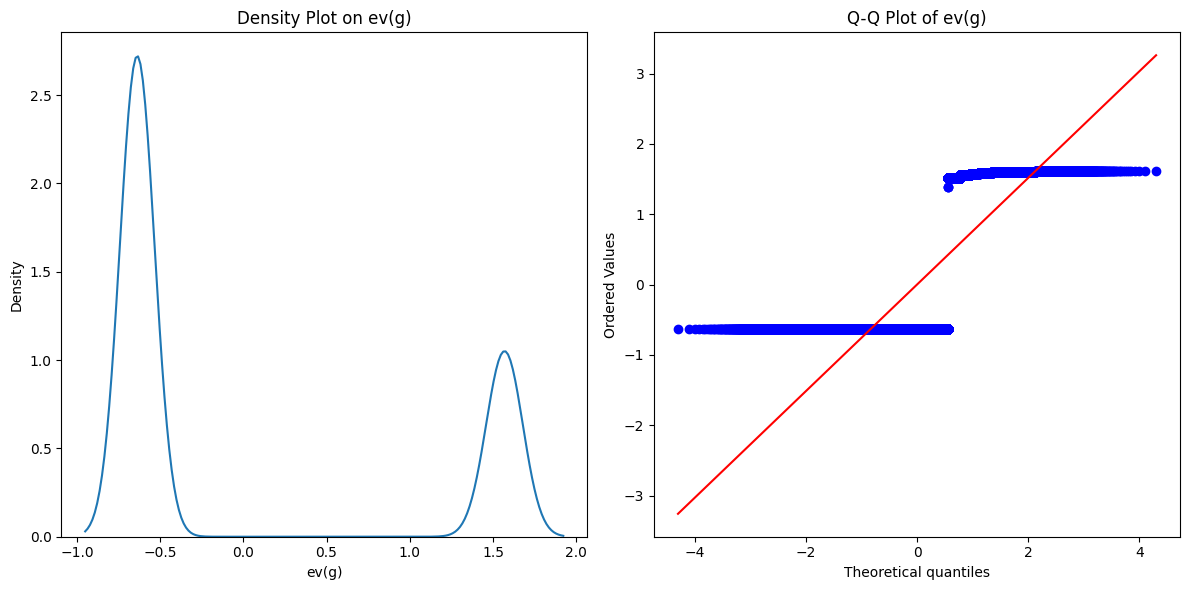

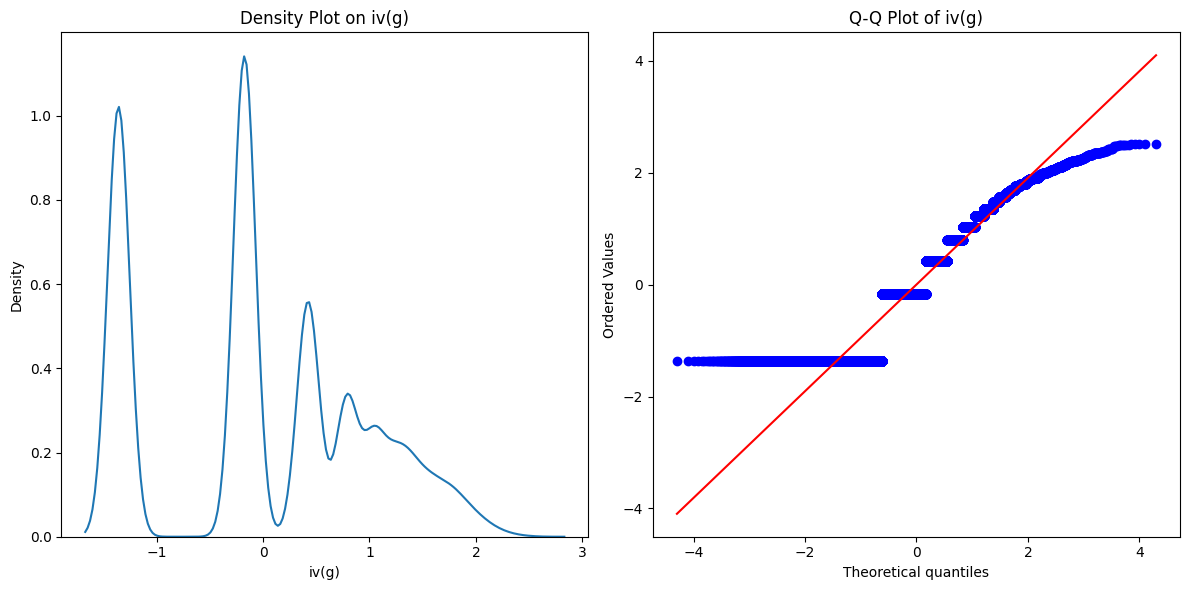

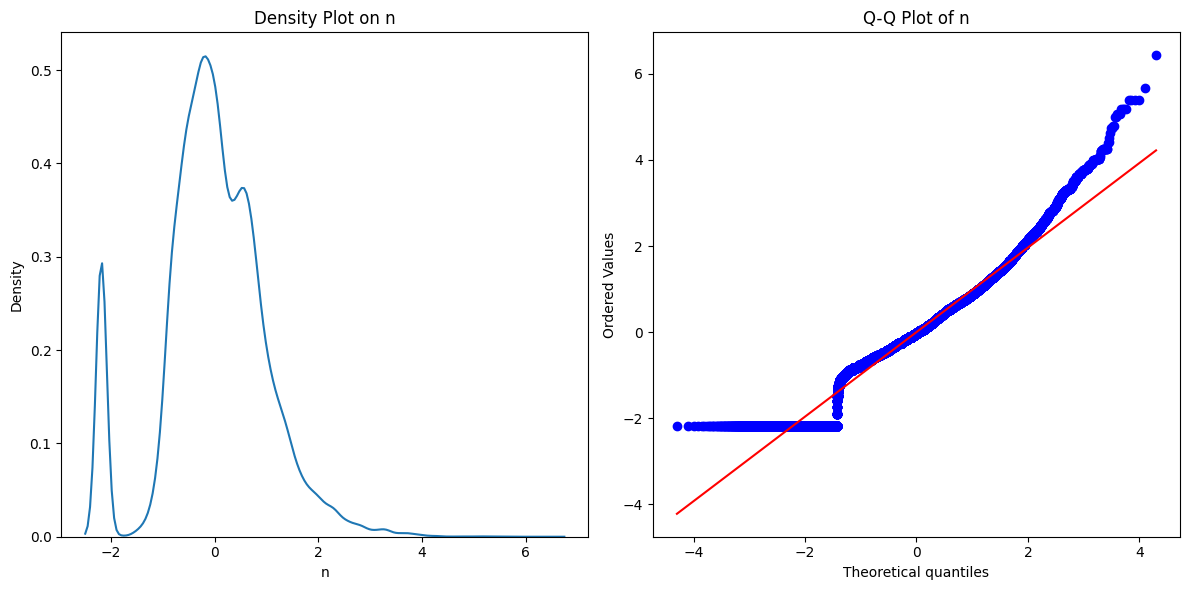

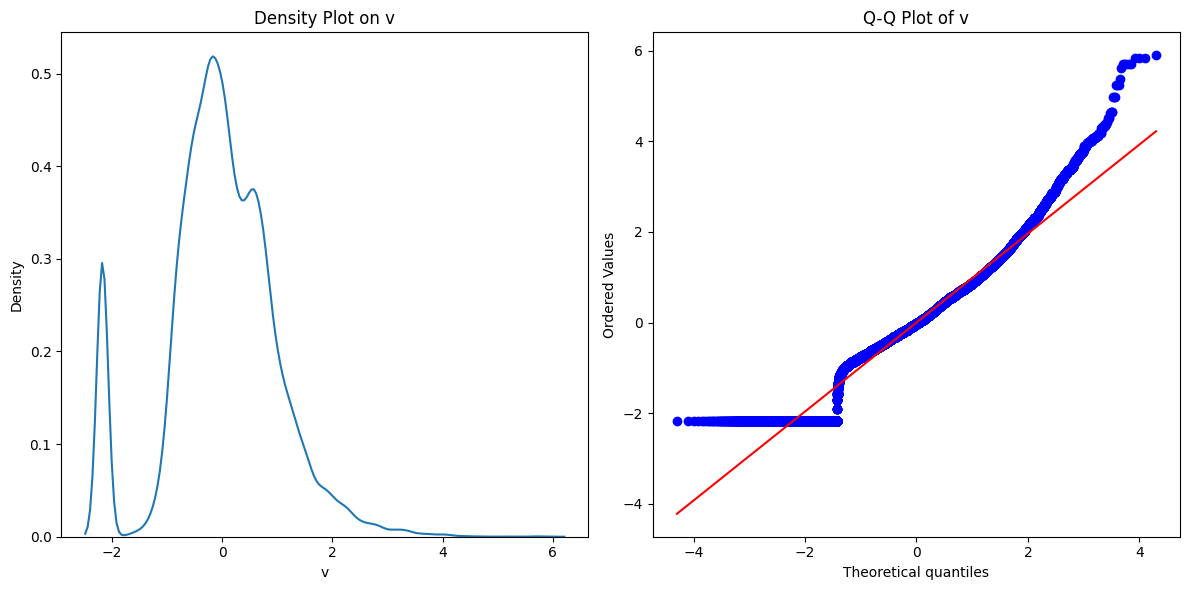

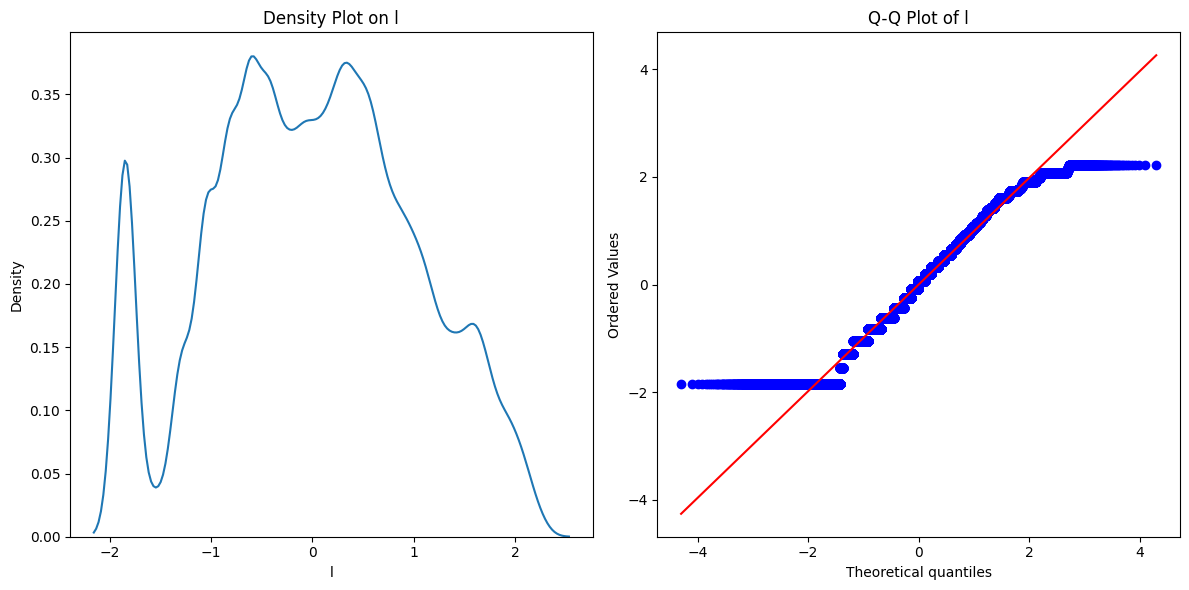

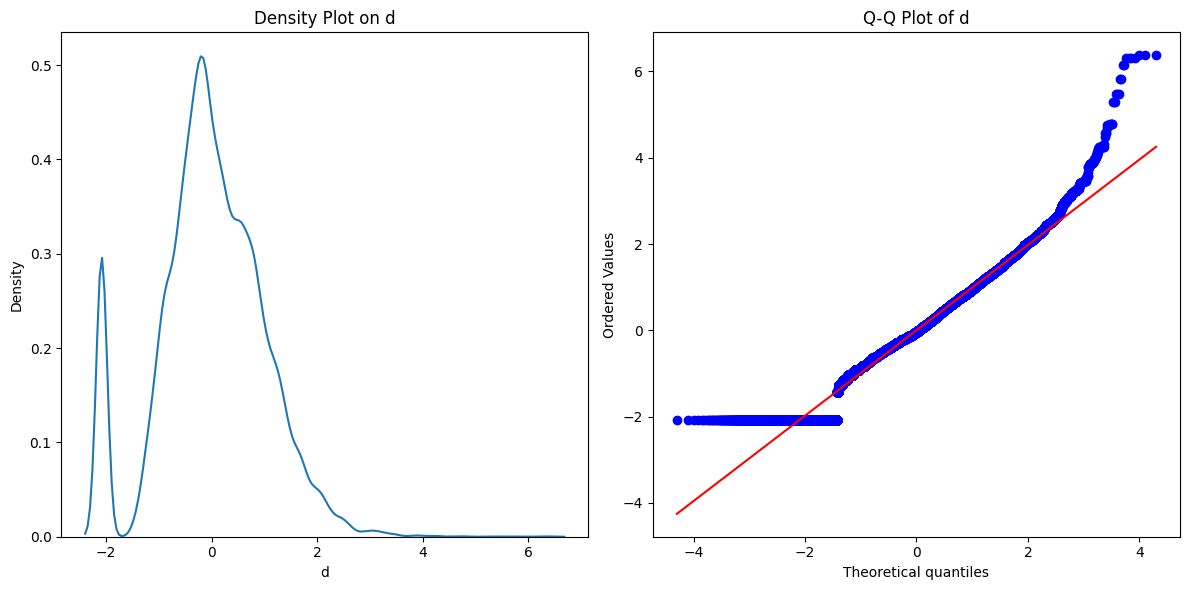

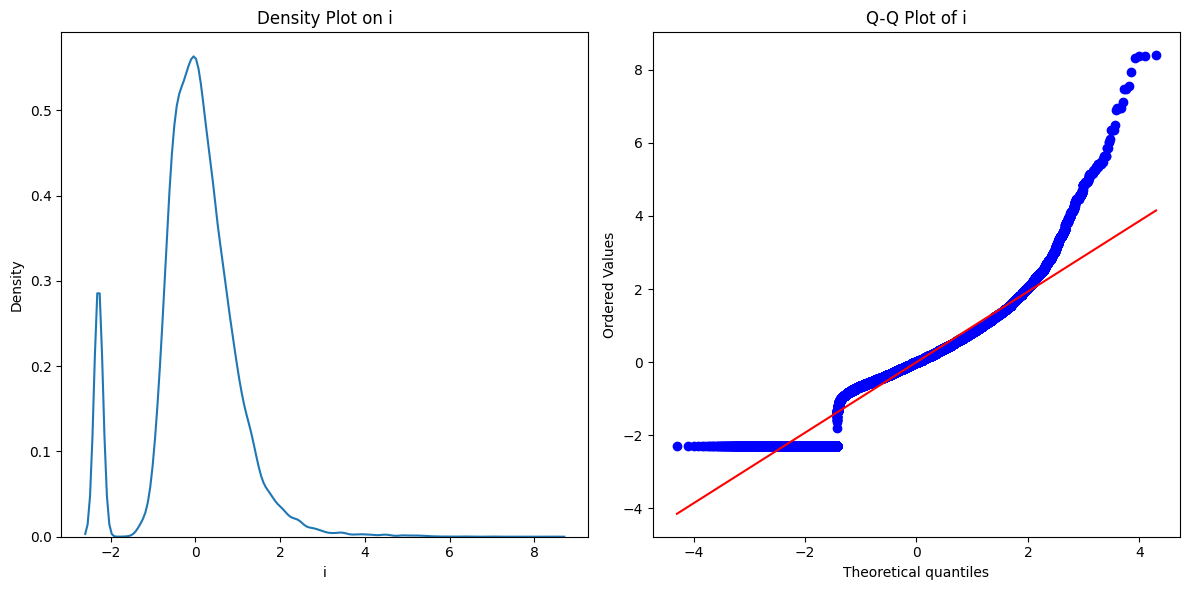

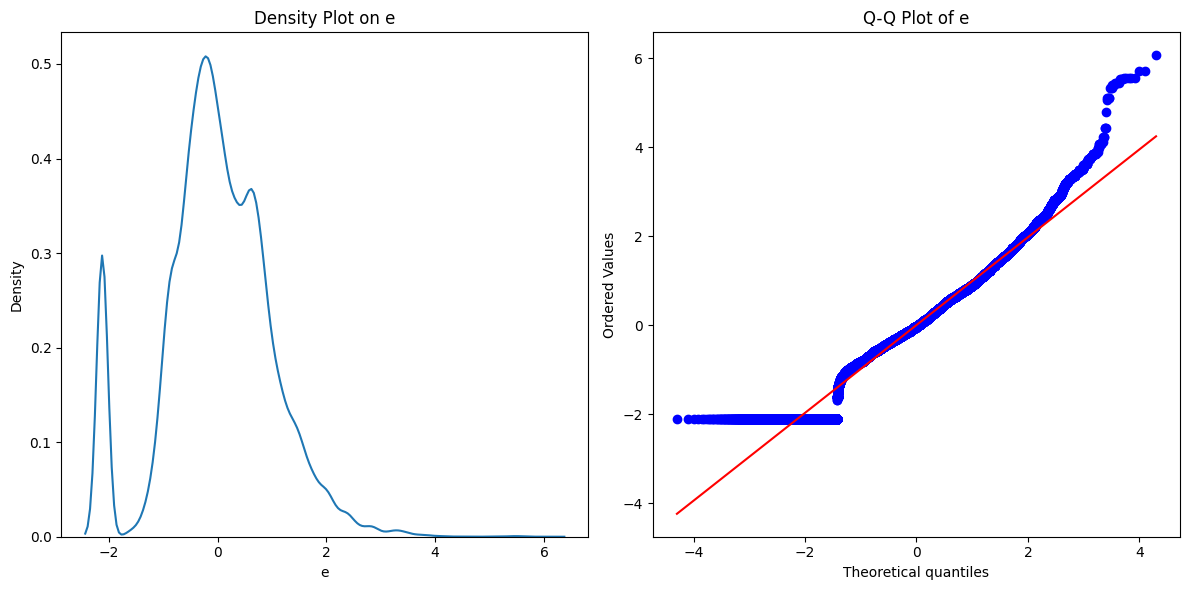

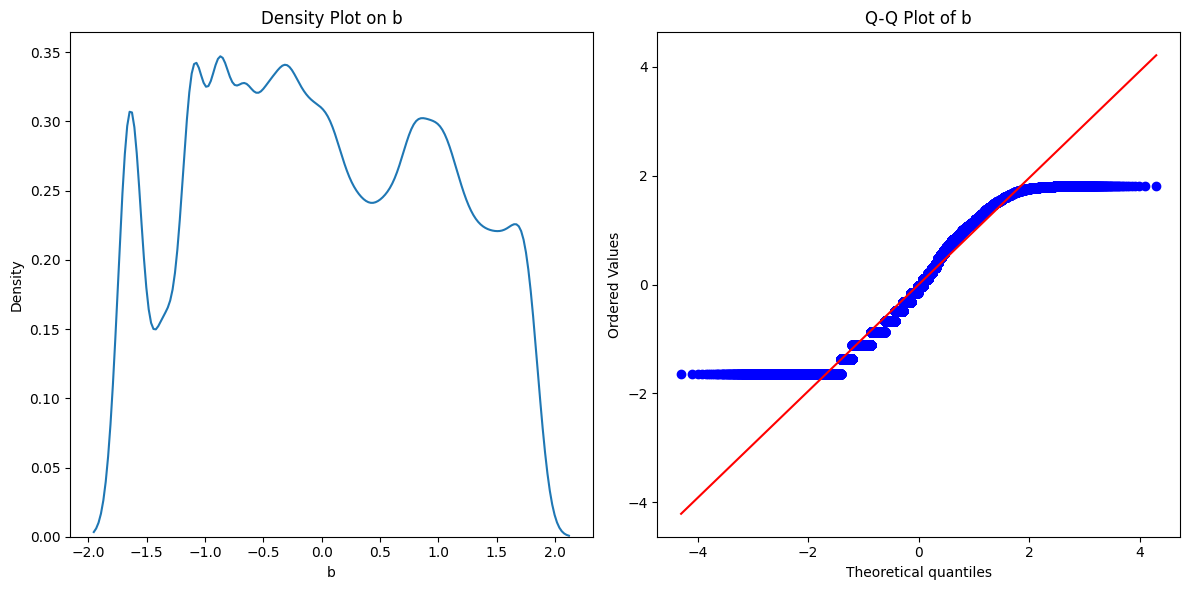

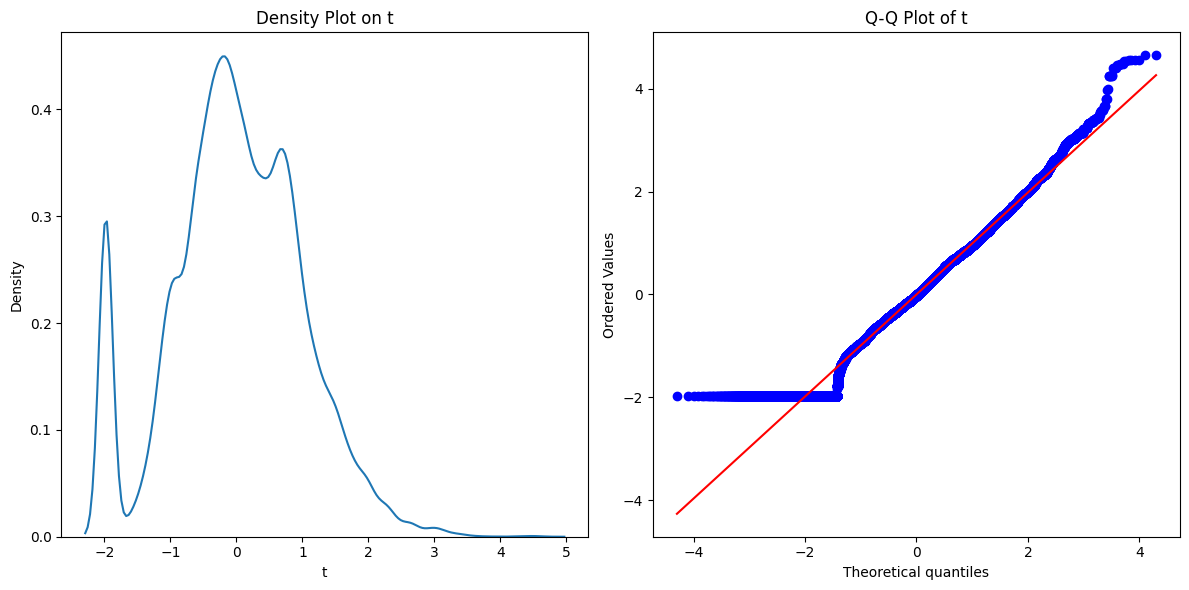

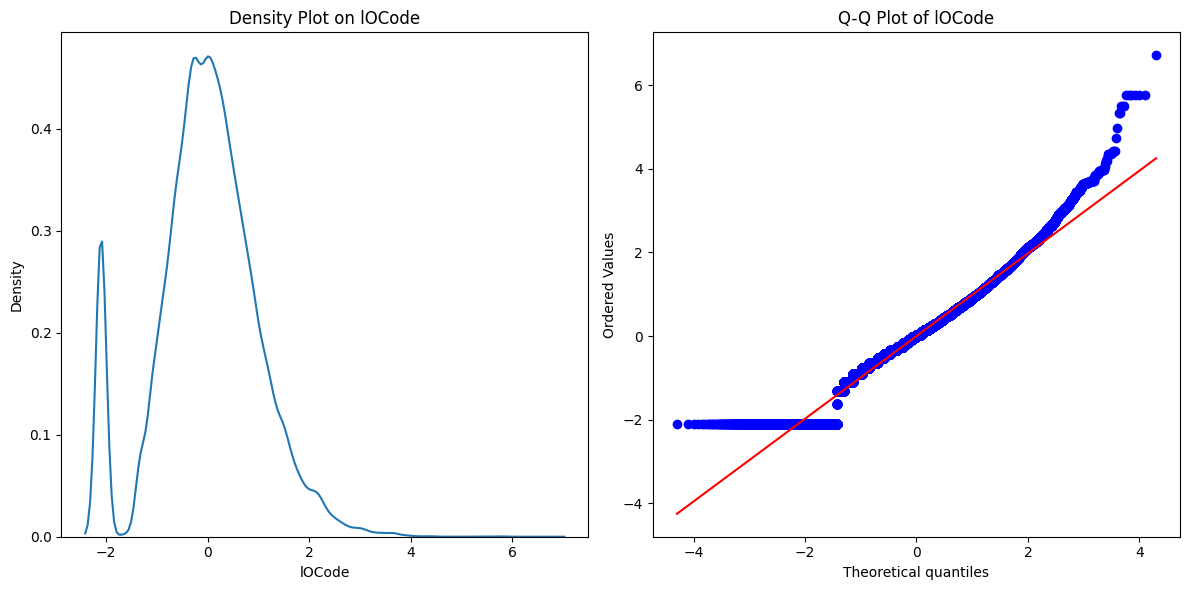

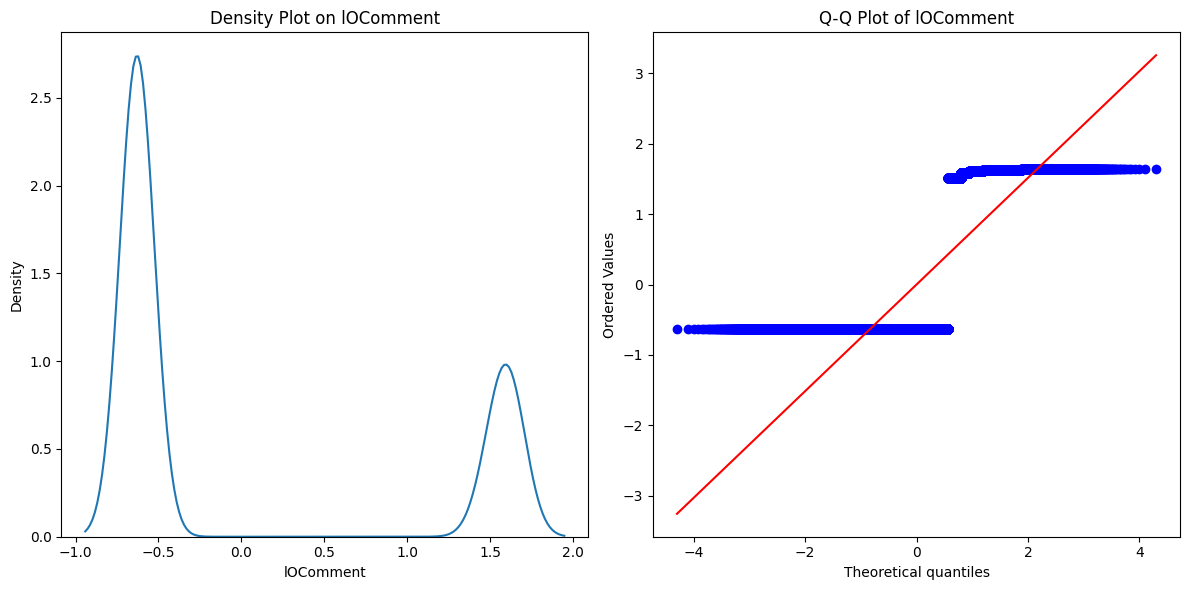

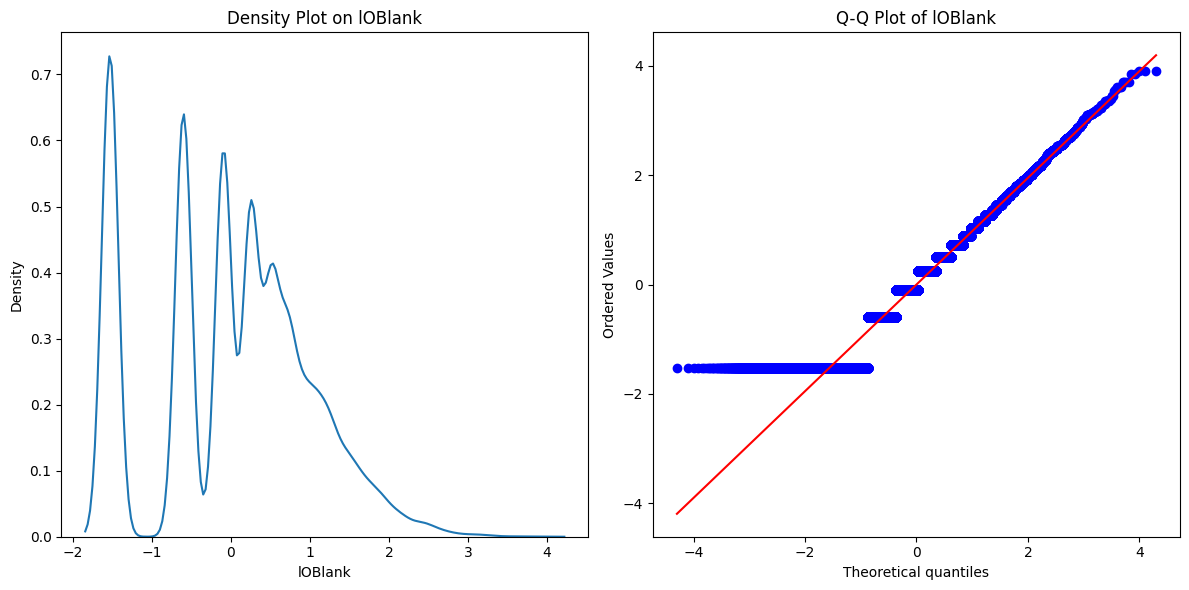

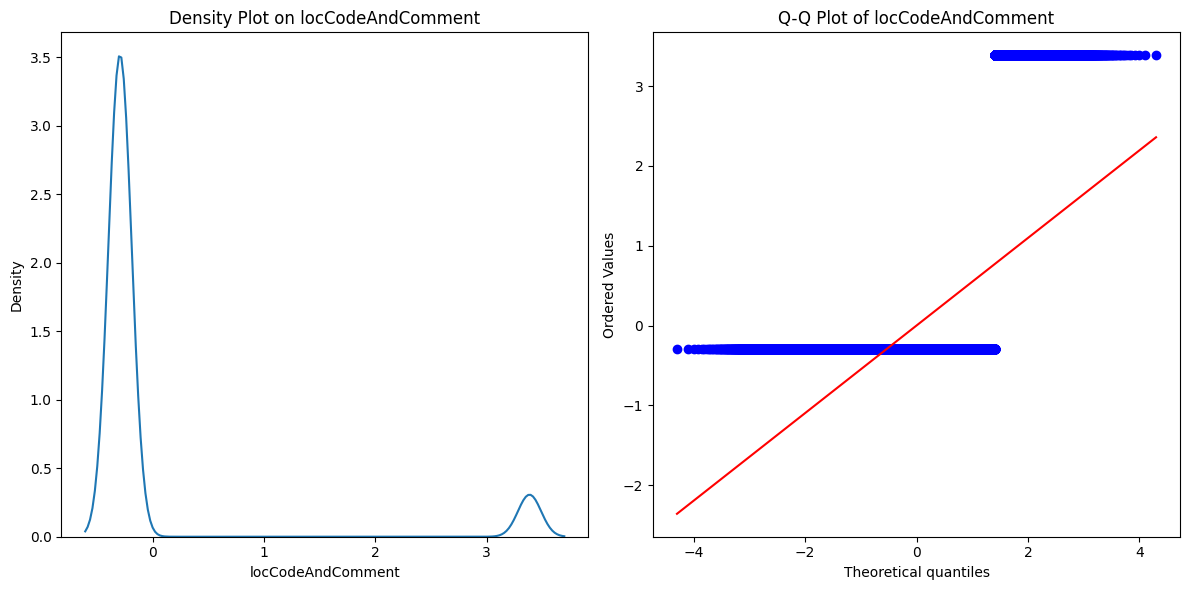

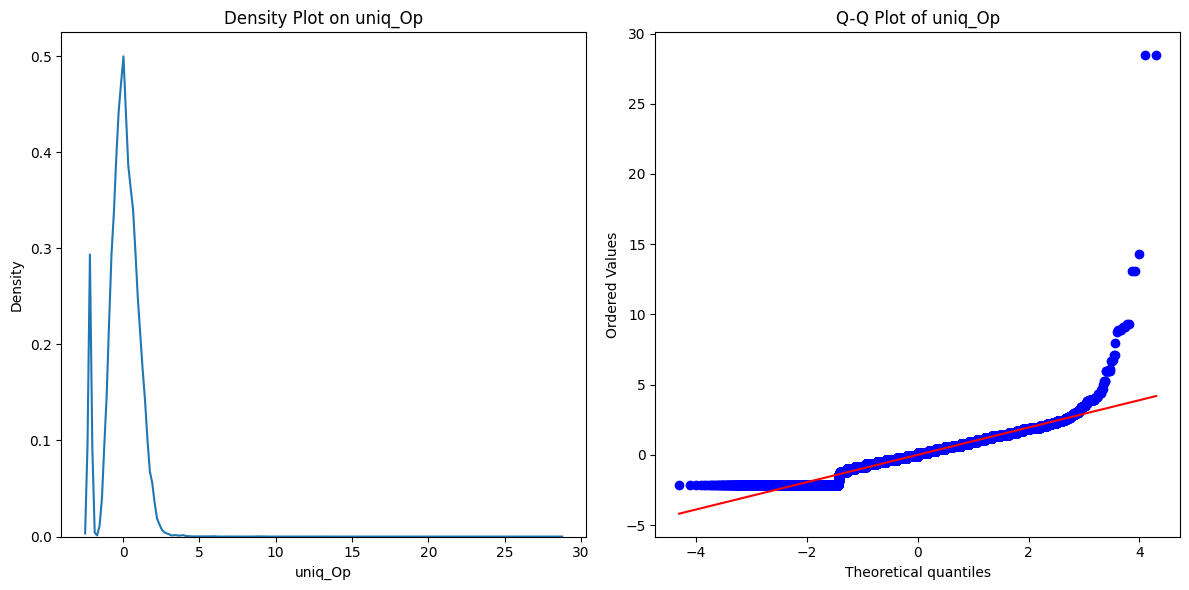

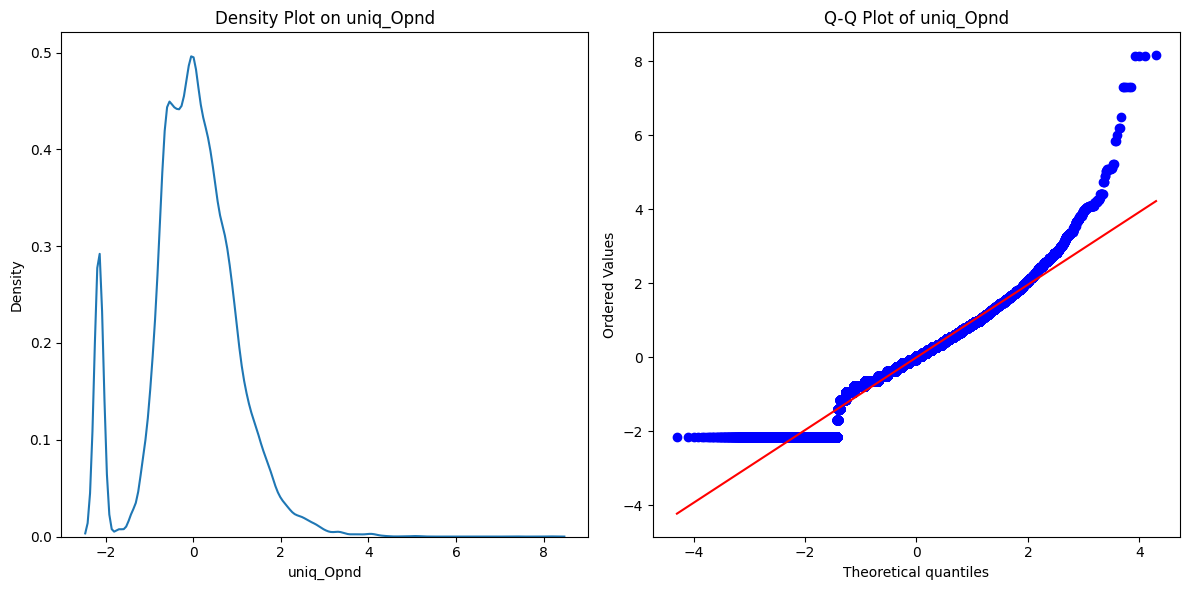

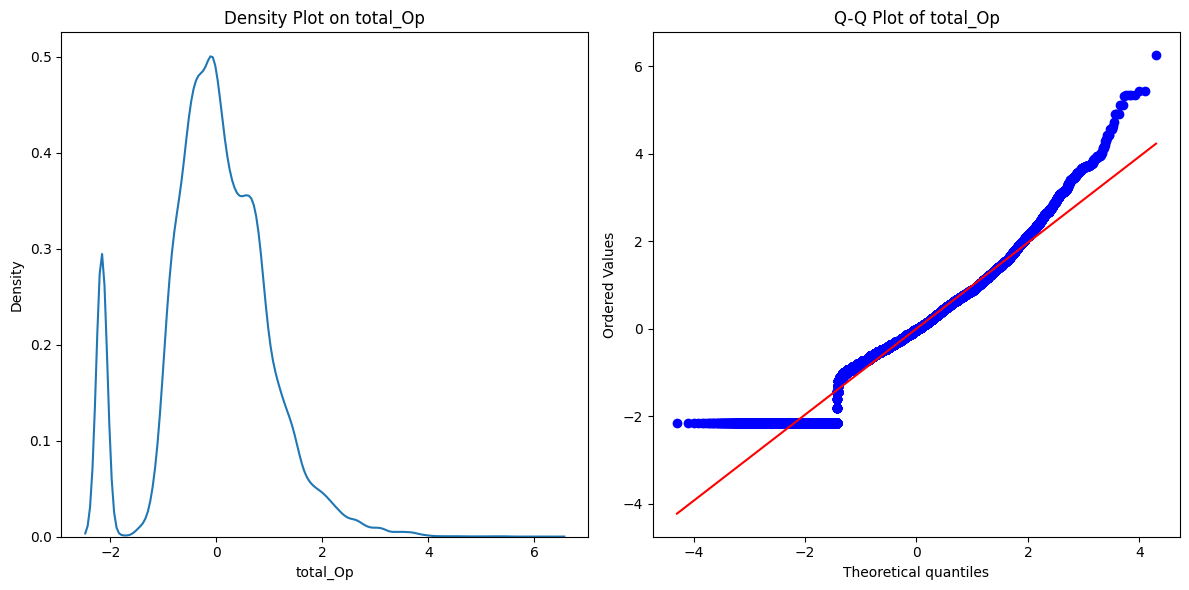

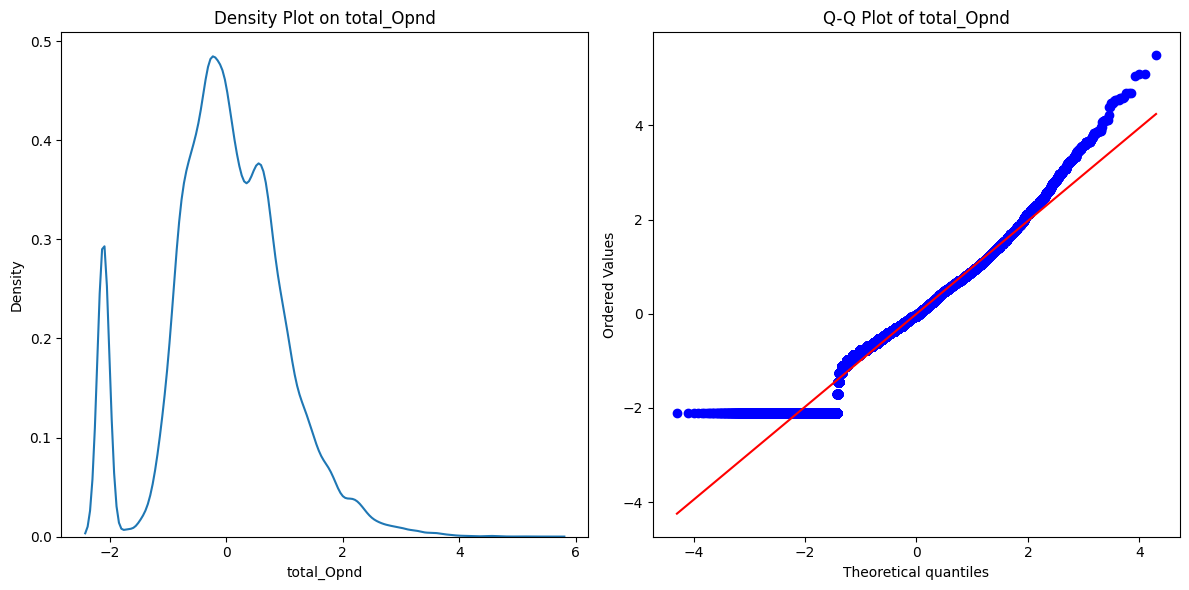

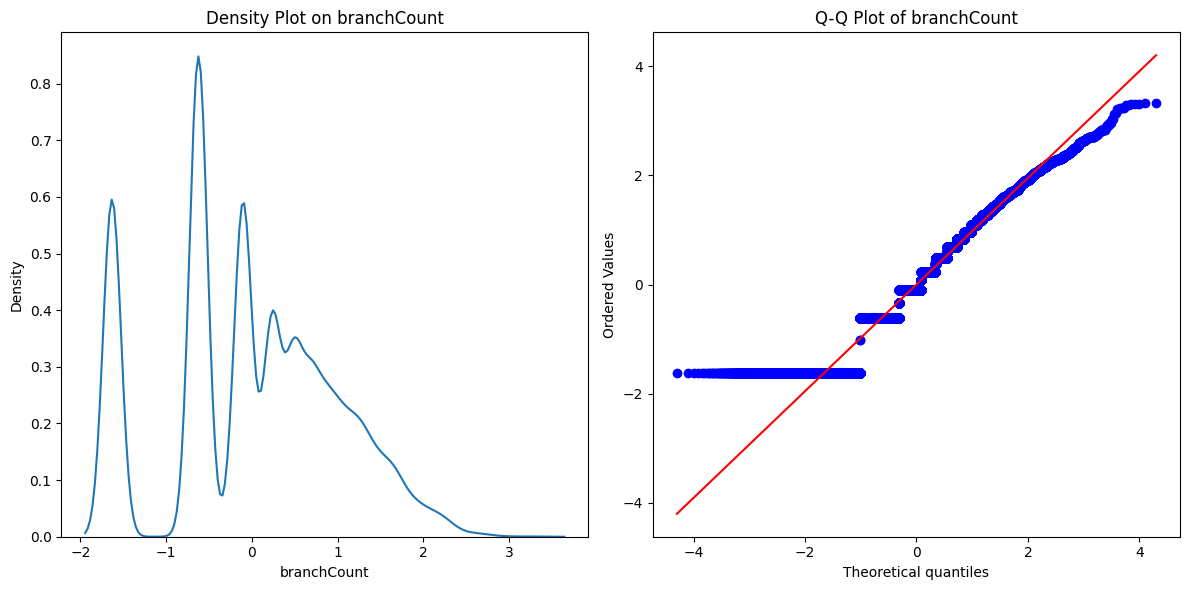

In [25]:
for column in X_train.columns :
    
    CheckSkewness(X_train, column)

In [ ]:
# Now data is skew 


